In [1]:
import numpy as np
import pandas as pd
import datetime as dtm
import matplotlib.pyplot as plt
import matplotlib.dates as dts
import netCDF4 as nc
import os
import re
import pytz

%matplotlib inline

# read in SOG data:

In [2]:
filename='/data/eolson/SOG/SOG-runs/SOGCompMZEff/profiles/hoff-SOG.dat'
file_obj = open(filename, 'rt')
for index, line in enumerate(file_obj):
    line = line.strip()
    if line.startswith('*FieldNames:'):
        field_names = line.split(': ', 1)[1].split(', ')
    elif line.startswith('*FieldUnits:'):
        field_units = line.split(': ', 1)[1].split(', ')
    elif line.startswith('*HoffmuellerStartYr:'):
        year_start = line.split(': ', 1)[1]
    elif line.startswith('*HoffmuellerStartDay:'):
        day_start = line.split(': ', 1)[1]
    elif line.startswith('*HoffmuellerStartSec:'):
        sec_start = line.split(': ', 1)[1]
    elif line.startswith('*HoffmuellerInterval:'):
         interval = line.split(': ', 1)[1]
    elif line.startswith('*EndOfHeader'):
        break
data = pd.read_csv(filename, delim_whitespace=True, header=0, names=field_names, skiprows=index, chunksize=102)
# Timestamp in matplotlib time
dt_num = dts.date2num(dtm.datetime.strptime(year_start + ' ' + day_start, '%Y %j')) + float(sec_start)/86400
interval=float(interval)
# Extract dataframe chunks into dictionary
for index, chunk in enumerate(data):
    if index==0:
        da=chunk
    else:
        da=np.dstack((da,chunk))
z=da[:,0,0]
t=np.arange(da.shape[2])
t=(t+1.0)*3600
tt,zz=np.meshgrid(t,-z)
print field_names
#print t
#print day_start
#print dts.num2date(dt_num)
#print z

['depth', 'temperature', 'salinity', 'sigma-t', 'micro phytoplankton', 'nano phytoplankton', 'pico phytoplankton', 'micro zooplankton', 'nitrate', 'ammonium', 'silicon', 'dissolved inorganic carbon', 'dissolved oxygen', 'alkalinity', 'DOC detritus', 'POC detritus', 'DON detritus', 'PON detritus', 'refractory N detritus', 'biogenic Si detritus', 'total momentum eddy diffusivity', 'total temperature eddy diffusivity', 'total salinity eddy diffusivity', 'photosynthetic available radiation', 'u velocity', 'v velocity']


Load SS2DSOG nuts & bio data:

In [3]:

resultsDir='/data/eolson/MEOPAR/SS2DSOGruns/run5x5_18/'
fname='SalishSea_1h_20041019_20041020_ptrc_T.nc'
f=nc.Dataset(os.path.join(resultsDir,fname))
fkeys=f.variables.keys()
lons=f.variables['nav_lon'][1,:]
lats=f.variables['nav_lat'][:,1]
for ik in fkeys:
    match = re.search(r'depth.',ik)
    if match:
        zkey=match.group(0)
zSS=f.variables[zkey][:]
xxSS,zzSS=np.meshgrid(lons,-z[:])
xtSS,ytSS=np.meshgrid(lons,lats)
print fkeys
f2name='/data/eolson/MEOPAR/SS2DSOGruns/nuts_SOG5x5_S3-2014-10-19-WithMRubraMicroZooRemin.nc'
f2=nc.Dataset(f2name)

[u'nav_lon', u'nav_lat', u'deptht', u'time_counter', u'NO3', u'NH4', u'Si', u'PHY2', u'PHY', u'ZOO2', u'ZOO', u'DOC', u'POC', u'DSi', u'O2']


REPEAT WITH LATER TIME FOR NEMO:

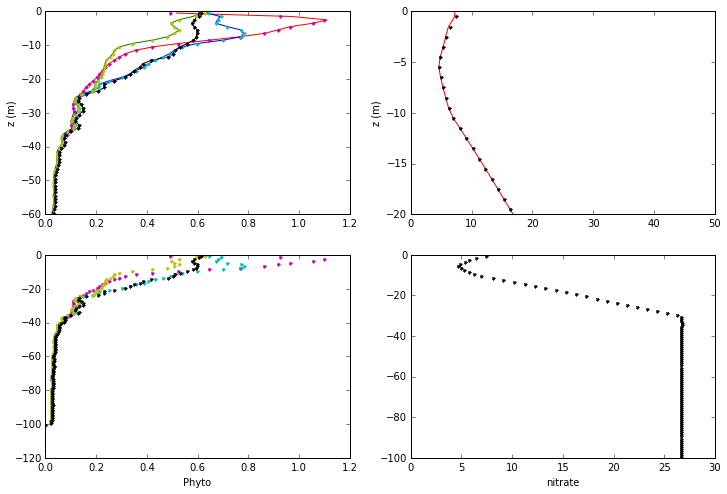

In [4]:
fig, axs = plt.subplots(2,2,figsize=(12,8))
ti=47 # hrs since start

# Phyto
iii=4
pl0=axs[0,0].plot(da[:,iii,ti],-z,'-',color='r')
iii=5
pl0=axs[0,0].plot(da[:,iii,ti],-z,'-',color='g')
iii=6
pl0=axs[0,0].plot(da[:,iii,ti],-z,'-',color='b')
iii=7
pl0=axs[0,0].plot(da[:,iii,ti],-z,'-',color='k')
#pl0=axs[0,0].plot(f2.variables['PHY'][0,0:101,2,2],-zSS[0:101],'-',color='k')
axs[0,0].set_ylabel('z (m)')
axs[1,0].set_xlabel('Phyto')
#pl1=axs[0].plot(da[:,iii,da.shape[2]-1],-z)
ivar1=f.variables['PHY2'][:,:,:,:] # diatoms
pl3=axs[1,0].plot(ivar1[360*ti,0:101,2,2],-zSS[0:101],'.',color='m')
pl3=axs[0,0].plot(ivar1[360*ti,0:101,2,2],-zSS[0:101],'.',color='m')
ivar2=f.variables['PHY'][:,:,:,:]
pl3=axs[1,0].plot(ivar2[360*ti,0:101,2,2],-zSS[0:101],'.',color='c')
pl3=axs[0,0].plot(ivar2[360*ti,0:101,2,2],-zSS[0:101],'.',color='c')
ivar3=f.variables['ZOO2'][:,:,:,:]
pl3=axs[1,0].plot(ivar3[360*ti,0:101,2,2],-zSS[0:101],'.',color='y')
pl3=axs[0,0].plot(ivar3[360*ti,0:101,2,2],-zSS[0:101],'.',color='y')
ivar4=f.variables['ZOO'][:,:,:,:]
pl4=axs[1,0].plot(ivar4[360*ti,0:101,2,2],-zSS[0:101],'.',color='k')
pl4=axs[0,0].plot(ivar4[360*ti,0:101,2,2],-zSS[0:101],'.',color='k')
axs[0,0].set_ylim([-60,0])

# NO
iii=8
pl0=axs[0,1].plot(da[:,iii,ti],-z,'-',color='r')
#pl0=axs[0,1].plot(f2.variables['NO3'][0,0:101,2,2],-zSS[0:101],'-',color='k')
axs[0,1].set_ylabel('z (m)')
axs[0,1].set_ylim([-20,0])
axs[1,1].set_xlabel(field_names[iii])
#pl1=axs[0].plot(da[:,iii,da.shape[2]-1],-z)
ivar=f.variables['NO3'][:,:,:,:]
pl3=axs[1,1].plot(ivar[360*ti-1,0:100,2,2],-zSS[0:100],'.',color='k')
pl3=axs[0,1].plot(ivar[360*ti-1,0:100,2,2],-zSS[0:100],'.',color='k')
#print ivar[0,0:100,2,2]


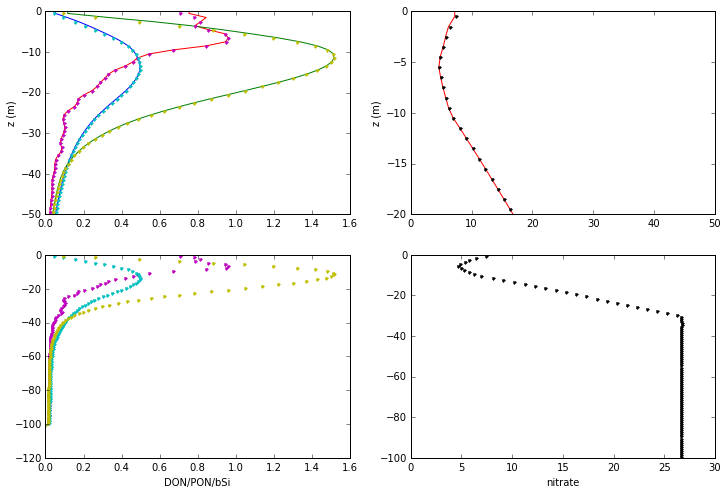

In [5]:
fig, axs = plt.subplots(2,2,figsize=(12,8))

# Phyto
iii=16
pl0=axs[0,0].plot(da[:,iii,ti],-z,'-',color='r')
iii=17
pl0=axs[0,0].plot(da[:,iii,ti],-z,'-',color='b')
iii=19
pl0=axs[0,0].plot(da[:,iii,ti],-z,'-',color='g')
#pl0=axs[0,0].plot(f2.variables['PHY'][0,0:101,2,2],-zSS[0:101],'-',color='k')
axs[0,0].set_ylabel('z (m)')
axs[1,0].set_xlabel('DON/PON/bSi')
#pl1=axs[0].plot(da[:,iii,da.shape[2]-1],-z)
ivar1=f.variables['DOC'][:,:,:,:]/7.6 
pl3=axs[1,0].plot(ivar1[360*ti,0:101,2,2],-zSS[0:101],'.',color='m')
pl3=axs[0,0].plot(ivar1[360*ti,0:101,2,2],-zSS[0:101],'.',color='m')
ivar2=f.variables['POC'][:,:,:,:]/7.6
pl3=axs[1,0].plot(ivar2[360*ti,0:101,2,2],-zSS[0:101],'.',color='c')
pl3=axs[0,0].plot(ivar2[360*ti,0:101,2,2],-zSS[0:101],'.',color='c')
ivar3=f.variables['DSi'][:,:,:,:]
pl3=axs[1,0].plot(ivar3[360*ti,0:101,2,2],-zSS[0:101],'.',color='y')
pl3=axs[0,0].plot(ivar3[360*ti,0:101,2,2],-zSS[0:101],'.',color='y')
axs[0,0].set_ylim([-50,0])
# NO
iii=8
pl0=axs[0,1].plot(da[:,iii,ti],-z,'-',color='r')
#pl0=axs[0,1].plot(f2.variables['NO3'][0,0:101,2,2],-zSS[0:101],'-',color='k')
axs[0,1].set_ylabel('z (m)')
axs[0,1].set_ylim([-20,0])
axs[1,1].set_xlabel(field_names[iii])
#pl1=axs[0].plot(da[:,iii,da.shape[2]-1],-z)
ivar=f.variables['NO3'][:,:,:,:]
pl3=axs[1,1].plot(ivar[360*ti-1,0:100,2,2],-zSS[0:100],'.',color='k')
pl3=axs[0,1].plot(ivar[360*ti-1,0:100,2,2],-zSS[0:100],'.',color='k')
#print ivar[0,0:100,2,2]


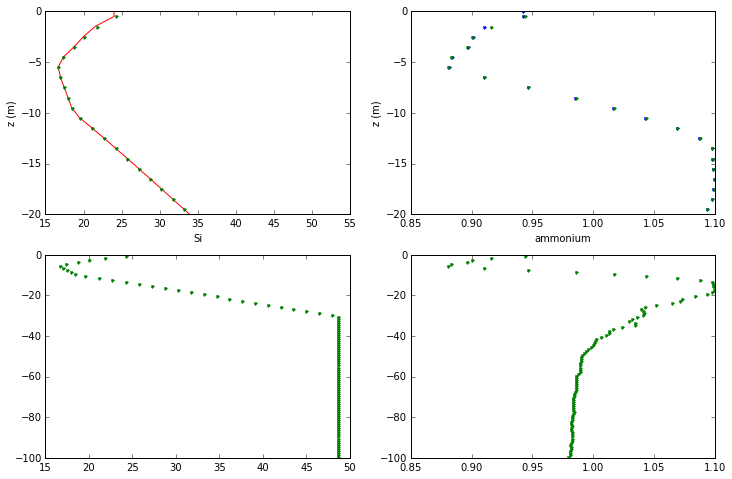

In [6]:
fig, axs = plt.subplots(2,2,figsize=(12,8))

# Si
iii=10
pl0=axs[0,0].plot(da[:,iii,ti],-z,'-',color='r')
axs[0,0].set_ylabel('z (m)')
axs[0,0].set_xlabel('Si')
axs[0,0].set_ylim([-20,0])
#pl0=axs[0,0].plot(f2.variables['Si'][0,0:101,2,2],-zSS[0:101],'-',color='k')
#pl1=axs[0].plot(da[:,iii,da.shape[2]-1],-z)
ivar=f.variables['Si'][:,:,:,:]
pl3=axs[1,0].plot(ivar[360*ti,0:100,2,2],-zSS[0:100],'.',color='g')
pl4=axs[0,0].plot(ivar[360*ti,0:100,2,2],-zSS[0:100],'.',color='g')

# NH4
iii=9
pl0=axs[0,1].plot(da[:,iii,ti],-z,'.',color='b')
#pl0=axs[0,1].plot(f2.variables['NH4'][0,0:101,2,2],-zSS[0:101],'-',color='k')
axs[0,1].set_ylabel('z (m)')
axs[0,1].set_xlabel(field_names[iii])
axs[0,1].set_ylim([-20,0])
#pl1=axs[0].plot(da[:,iii,da.shape[2]-1],-z)
ivar=f.variables['NH4'][:,:,:,:]
pl3=axs[1,1].plot(ivar[360*ti,0:100,2,2],-zSS[0:100],'.',color='g')
pl4=axs[0,1].plot(ivar[360*ti,0:100,2,2],-zSS[0:100],'.',color='g')
#axs[0,1].set_xlim([.8,1.2])

In [7]:
ivar1=f.variables['PHY2'][:,:,:,:] # diatoms
print ivar1[182,0:101,2,2]


[ 0.77256191  0.76613927  0.70409137  0.67376989  0.7575298   0.86507678
  0.90402734  0.91695821  0.83118272  0.66545779  0.5592171   0.52191043
  0.51769722  0.48743236  0.43921822  0.41461325  0.40603876  0.38322252
  0.36803877  0.34252876  0.28828159  0.2449342   0.24501896  0.22200833
  0.16960745  0.14090572  0.13740477  0.14964944  0.1572184   0.15635961
  0.14094809  0.12833539  0.12440817  0.13915212  0.1367131   0.10413822
  0.08389223  0.07754026  0.08022139  0.07654621  0.06519986  0.05692642
  0.0567366   0.05746796  0.05638706  0.05305778  0.04768923  0.04439541
  0.04156153  0.0400454   0.03958156  0.03956654  0.0403908   0.03979915
  0.03951795  0.03976942  0.0400063   0.03921503  0.03547122  0.03298827
  0.03316526  0.03405263  0.03368543  0.03322333  0.03363562  0.0345255
  0.03416862  0.03197654  0.03007016  0.0303246   0.02988979  0.02926425
  0.02921681  0.0299389   0.03038423  0.02998181  0.0304761   0.03091906
  0.03048616  0.02792694  0.02748219  0.02775234  0.

In [8]:
f.close()
f2.close()